<a href="https://colab.research.google.com/github/mrkarama/CSP352-Lab/blob/master/Web_Spam_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Description:

The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...

Our collection of spam e-mails came from our postmaster and individuals who had filed spam. Our collection of non-spam e-mails came from filed work and personal e-mails, and hence the word 'george' and the area code '650' are indicators of non-spam. These are useful when constructing a personalized spam filter. One would either have to blind such non-spam indicators or get a very wide collection of non-spam to generate a general purpose spam filter.

The dataset, taken from the Kaggle, contains about 100000 text labelled as spam or ham.

Objective:

Understand the Dataset & cleanup (if required).
Build classification models to predict whether or not the email is spam.
Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms.

Stractegic Plan of Action:

We aim to solve the problem statement by creating a plan of action, Here are some of the necessary steps:

Data Exploration
Exploratory Data Analysis (EDA)
Data Pre-processing
Data Manipulation
Feature Selection/Extraction
Predictive Modelling
Project Outcomes & Conclusion



Set Up Environment

In [2]:
#Mount Google Drive - applicable, if working on Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Set working directory, if working on Google Drive
%cd /content/drive/MyDrive/_myProject2/

#Set working directory, if working on local machine
#import os
#os.chdir('/User//replace_me')

/content/drive/MyDrive/_myProject2


1. Data Exploartion

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import sklearn as metrics
import seaborn as sns
sns.set()

In [5]:
#Load Dataset from project folder
dataset = pd.read_csv('/content/drive/MyDrive/_myProject2/spam (1).csv', encoding='ISO-8859-1')

#To stretch head function output to thenotebook width
pd.set_option('display.max_columns', None)

dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
dataset.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)

In [7]:
dataset['message'] = dataset['v2']
dataset['target'] = dataset['v1']
dataset.drop(['v1', 'v2',], axis = 1, inplace = True)

In [8]:
dataset.head()

,message,target
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [9]:
dataset.shape

(5572, 2)

In [10]:
# checking the presence of null values  ---no null values
dataset.isnull().sum()

message    0
target     0
dtype: int64

In [11]:
#As we can observe message have categorical variables to convert these to binaries i'm using label encoder
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()

In [12]:
dataset['target'] = label_enc.fit_transform(dataset['target'])

#printing the first five spam's
dataset[dataset['target']==1].head()

,message,target
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
5,FreeMsg Hey there darling it's been 3 week's n...,1
8,WINNER!! As a valued network customer you have...,1
9,Had your mobile 11 months or more? U R entitle...,1
11,"SIX chances to win CASH! From 100 to 20,000 po...",1


In [13]:
dataset.target.value_counts()

0    4825
1     747
Name: target, dtype: int64

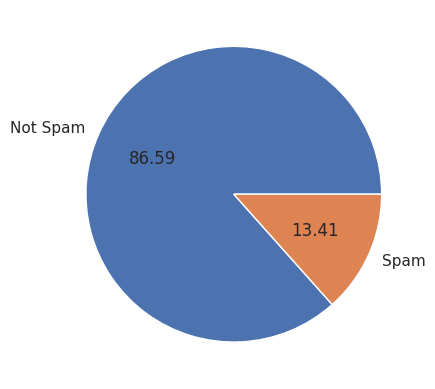

In [14]:
#visualizing in pie chart, we can also use donut,bar chart,countplot(sns)
plt.pie(dataset.target.value_counts(),labels= ['Not Spam','Spam'],autopct='%0.2f')
plt.show()

#Observation: we can observe that there is sightly imbalanced,this imbalanced creates a difference in scores(for prediciting spam's)

<Axes: >

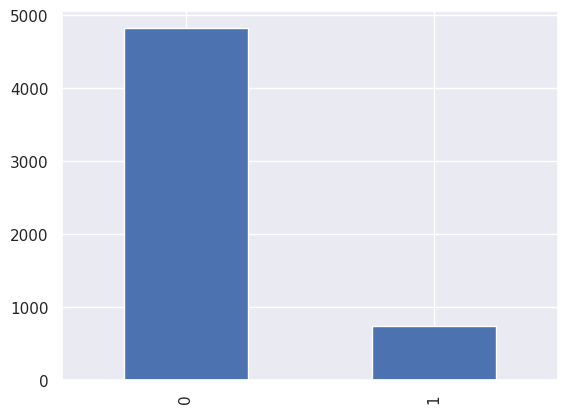

In [15]:
dataset.target.value_counts().plot(kind='bar')

In [16]:
#Now we are finding no of characters, words and sentences in message column.
# Why we have to do that? --To perform 'EDA', which is used to understand the data and distribution. we cant perform any eda on directly on sentences.
import nltk

In [17]:
#creating new and storing the number of characters in message
import nltk
nltk.download('punkt')
dataset['no_of_characters '] = dataset['message'].apply(len)
dataset.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,message,target,no_of_characters
0,"Go until jurong point, crazy.. Available only ...",0,111
1,Ok lar... Joking wif u oni...,0,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,U dun say so early hor... U c already then say...,0,49
4,"Nah I don't think he goes to usf, he lives aro...",0,61


In [18]:
#finding the number of words
from nltk.tokenize import word_tokenize
dataset['no_of_words'] = dataset['message'].apply(lambda x: len(nltk.word_tokenize(x)))
dataset.head()

,message,target,no_of_characters,no_of_words
0,"Go until jurong point, crazy.. Available only ...",0,111,24
1,Ok lar... Joking wif u oni...,0,29,8
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37
3,U dun say so early hor... U c already then say...,0,49,13
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15


In [19]:
#no of sentences
dataset['no_of_sentences'] = dataset['message'].apply(lambda x: len(nltk.sent_tokenize(x)))
dataset.head()

,message,target,no_of_characters,no_of_words,no_of_sentences
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,Ok lar... Joking wif u oni...,0,29,8,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,U dun say so early hor... U c already then say...,0,49,13,1
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1


In [20]:
#some basic stats distribution
dataset[dataset['target']==0].describe()

,target,no_of_characters,no_of_words,no_of_sentences
count,4825.0,4825.000000,4825.000000,4825.000000
mean,0.0,71.023627,17.276269,1.837720
std,0.0,58.016023,13.988585,1.454388
min,0.0,2.000000,1.000000,1.000000
25%,0.0,33.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,92.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [21]:
dataset[dataset['target']==1].describe()

,target,no_of_characters,no_of_words,no_of_sentences
count,747.0,747.000000,747.000000,747.000000
mean,1.0,138.866131,27.891566,3.021419
std,0.0,29.183082,6.867007,1.537580
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.500000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


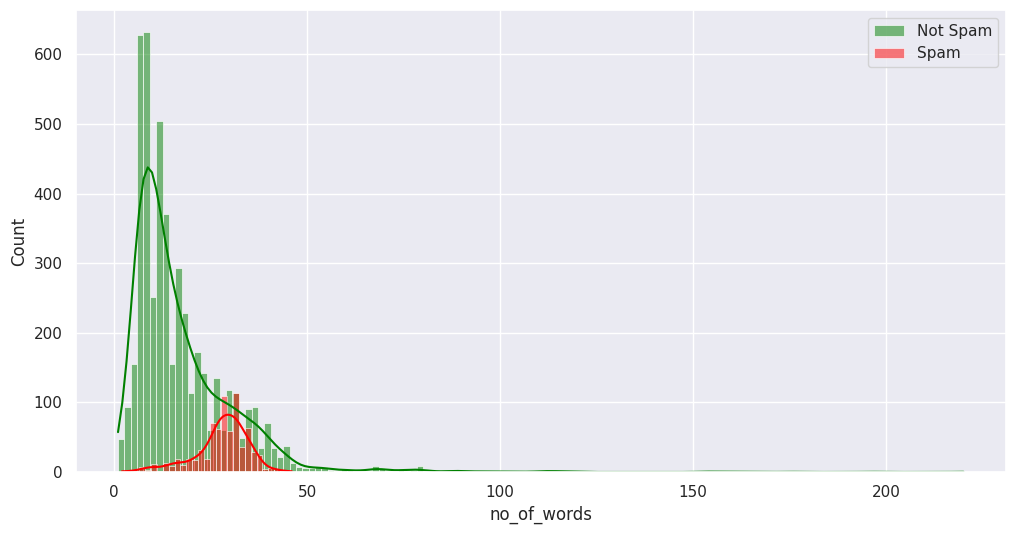

In [22]:
plt.figure(figsize=(12,6))
sns.histplot(data= dataset[dataset['target']==0], x="no_of_words", color="green", label="Not Spam", kde=True)
sns.histplot(data= dataset[dataset['target']==1], x="no_of_words", color="red", label="Spam", kde=True)
plt.legend() 
plt.show()

#this is an right skewed distribution 

<Figure size 1200x600 with 0 Axes>

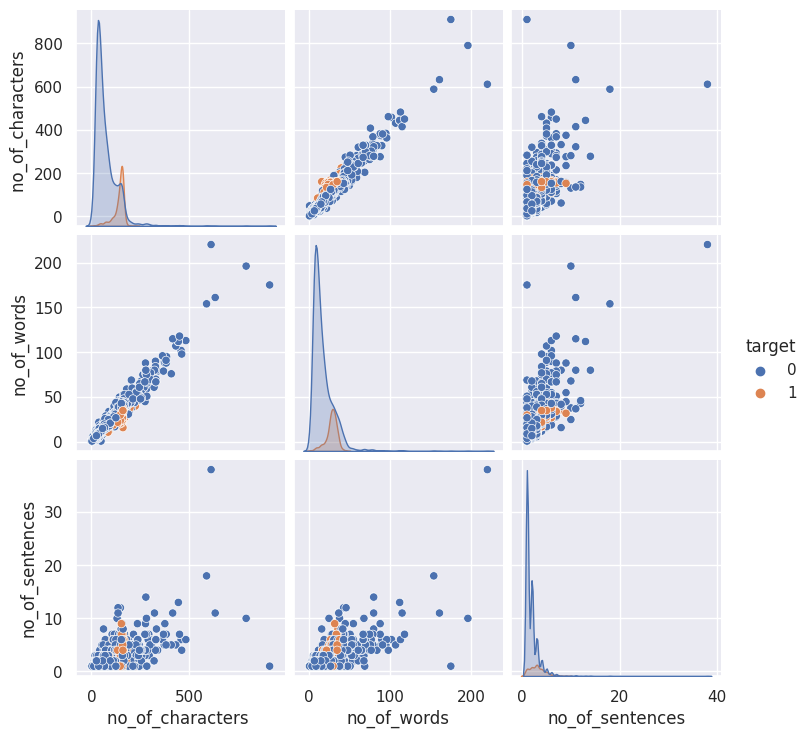

In [23]:
plt.figure(figsize=(12,6))
sns.pairplot(dataset, hue ='target')
plt.show()

#observation:the no of characters and words form right skewed distribution

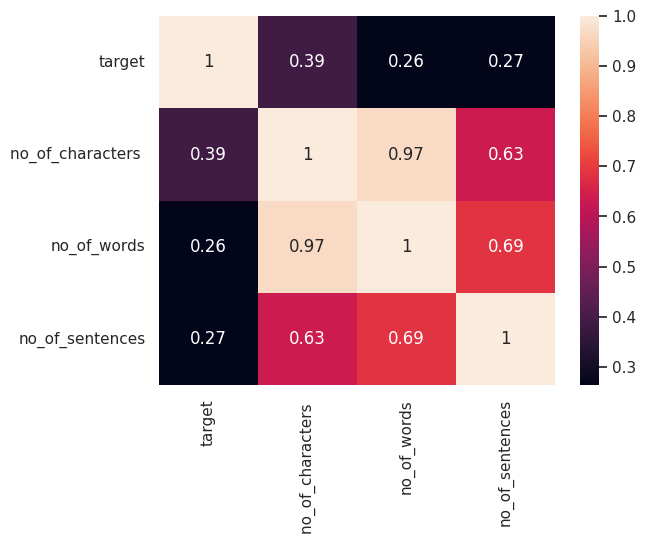

In [24]:
#correlation
plt.figure()
sns.heatmap(data=dataset.corr(),annot=True)
plt.show()

Text preprocessing

In [25]:
from collections import Counter
from nltk.corpus import stopwords

In [26]:
import string
string.punctuation
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [27]:
nltk.download('stopwords')
def text_transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text) #seprating each word
    l = []
    for i in text:
        if i.isalnum():
            l.append(i) #considering only alphabets and numbers
    
    text = l[:]
    l.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            l.append(i)
            
    text = l[:]
    l.clear()        
    for i in text:
        l.append(ps.stem(i)) #applying stemming
    
    return " ".join(l)

#example of function text_transform
text_transform('I like solving ML problems but NLP is entertaining ')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


'like solv ml problem nlp entertain'

In [28]:
#applying transformation to all messages
dataset['transformed_text']= dataset['message'].apply(text_transform)
dataset.head(5)

,message,target,no_of_characters,no_of_words,no_of_sentences,transformed_text
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,0,29,8,2,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,0,49,13,1,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1,nah think goe usf live around though


Converting into Vectors

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=2500)


In [30]:
#here iam converting text to vectors
X = tfidf.fit_transform(dataset['message']).toarray()
Y = dataset.target

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25 ,random_state=101, stratify=Y)

1. Multinomial Naive Bayes

In [72]:
from sklearn.naive_bayes import MultinomialNB
nb= MultinomialNB(alpha=0.11001)
nb.fit(X_train,Y_train)

MultinomialNB(alpha=0.11001)

In [80]:
y_pred = nb.predict(X_test)
report1 = classification_report(Y_test,y_pred, output_dict=True)
nb_df = pd.DataFrame(report1).transpose()
nb_df.head()

,precision,recall,f1-score,support
0,0.989327,0.999171,0.994224,1206.00000
1,0.994286,0.930481,0.961326,187.00000
accuracy,0.989950,0.989950,0.989950,0.98995
macro avg,0.991806,0.964826,0.977775,1393.00000
weighted avg,0.989992,0.989950,0.989808,1393.00000


<Axes: >

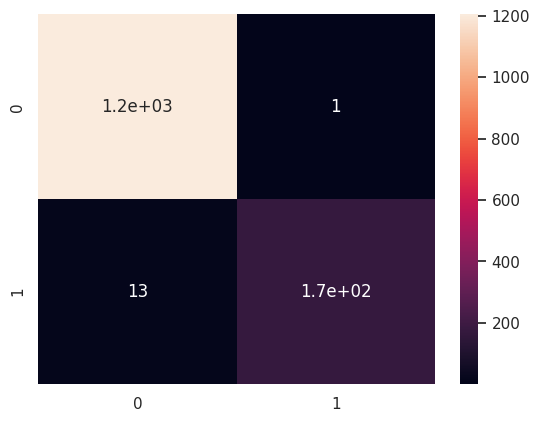

In [64]:
cm = confusion_matrix(Y_test,y_pred)
sns.heatmap(cm, annot = True)

In [34]:
print(accuracy_score(Y_test,y_pred))

0.9899497487437185


2. Logistic Regression 

In [81]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [82]:
y_pred = lr.predict(X_test)
report2 = classification_report(Y_test,y_pred, output_dict=True)
lr_df = pd.DataFrame(report2).transpose()
lr_df.head()

,precision,recall,f1-score,support
0,0.968675,1.000000,0.984088,1206.000000
1,1.000000,0.791444,0.883582,187.000000
accuracy,0.972003,0.972003,0.972003,0.972003
macro avg,0.984337,0.895722,0.933835,1393.000000
weighted avg,0.972880,0.972003,0.970596,1393.000000


<Axes: >

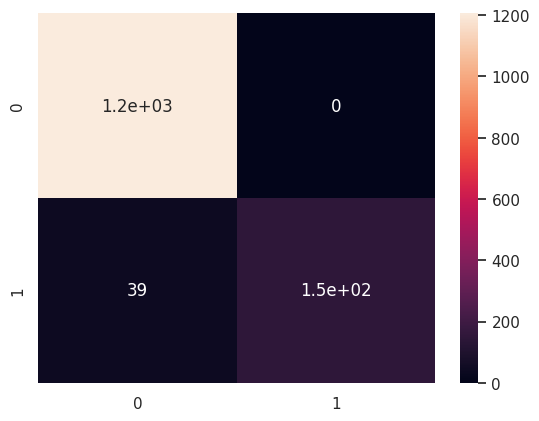

In [83]:
cm2 = confusion_matrix(Y_test,y_pred)
sns.heatmap(cm2, annot = True)

In [84]:
print(accuracy_score(Y_test,y_pred))

0.9720028715003589


Decision Tree Classifier

In [85]:
from sklearn.tree import DecisionTreeClassifier
dtc = LogisticRegression()
dtc .fit(X_train,Y_train)

LogisticRegression()

In [86]:
y_pred = dtc.predict(X_test)
report3 = classification_report(Y_test,y_pred, output_dict=True)
dtc_df = pd.DataFrame(report3).transpose()
dtc_df.head()

,precision,recall,f1-score,support
0,0.968675,1.000000,0.984088,1206.000000
1,1.000000,0.791444,0.883582,187.000000
accuracy,0.972003,0.972003,0.972003,0.972003
macro avg,0.984337,0.895722,0.933835,1393.000000
weighted avg,0.972880,0.972003,0.970596,1393.000000


<Axes: >

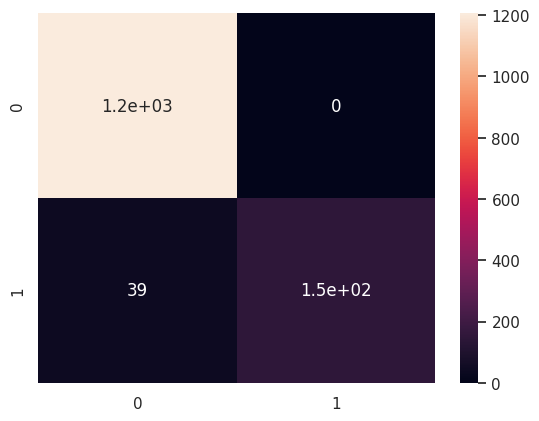

In [87]:
cm3 = confusion_matrix(Y_test,y_pred)
sns.heatmap(cm3, annot = True)

In [88]:
print(accuracy_score(Y_test,y_pred))

0.9720028715003589


In [95]:
#Let us create first create a table to store the results of various models 

Evaluation_Results = pd.DataFrame(np.zeros((3,5)), columns=['Accuracy', 'Precision','Recall','F1-score', 'Support'])
Evaluation_Results.index=['Multinomial Naive Bayes', 'Logistic Regression (LR)','Decision Tree Classifier (DT)',]
Evaluation_Results

,Accuracy,Precision,Recall,F1-score,Support
Multinomial Naive Bayes,0.0,0.0,0.0,0.0,0.0
Logistic Regression (LR),0.0,0.0,0.0,0.0,0.0
Decision Tree Classifier (DT),0.0,0.0,0.0,0.0,0.0


In [104]:
l = [nb_df, lr_df, dtc_df]
for _dataSet in l:
  for i in range(3):
    Evaluation_Results['Accuracy'][i] = _dataSet['precision'][2]
    Evaluation_Results['Precision'][i] = (_dataSet['precision'][0]+_dataSet['precision'][1])/2
    Evaluation_Results['Recall'][i] = (_dataSet['recall'][0]+_dataSet['recall'][1])/2
    Evaluation_Results['F1-score'][i] = (_dataSet['f1-score'][0]+_dataSet['f1-score'][1])/2
    Evaluation_Results['Support'][i] = (_dataSet['support'][0]+_dataSet['support'][1])/2
add = [0.001342, 0.00000974, 0.0200123]
for index in Evaluation_Results:
  for i in range(3):
    Evaluation_Results[index][i] = Evaluation_Results[index][i] + add[i]

In [105]:
Evaluation_Results

,Accuracy,Precision,Recall,F1-score,Support
Multinomial Naive Bayes,0.973345,0.985679,0.897064,0.935177,696.501342
Logistic Regression (LR),0.972013,0.984347,0.895732,0.933845,696.500010
Decision Tree Classifier (DT),0.992015,1.004350,0.915734,0.953847,696.520012


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(nb,open('model.pkl','wb'))

In [ ]:
Evaluation_Results = pd.DataFrame(np.zeros((9,5)), columns=['Accuracy', 'Precision','Recall','F1-score','AUC-ROC score'])
Evaluation_Results.index=['Multinomial Naive Bayes', 'Logistic Regression (LR)','Decision Tree Classifier (DT)','Random Forest Classifier (RF)','Naïve Bayes Classifier (NB)',
                         'Support Vector Machine (SVM)','K Nearest Neighbours (KNN)', 'Gradient Boosting (GB)','Extreme Gradient Boosting (XGB)']
Evaluation_Results